# Data Import

In [2]:
import pandas as pd

# Import csv data
df = pd.read_csv("data.csv")
print(df.shape)
df.head()

(169909, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


# Data Preparation

In [10]:
# Remove bad features
df = df.drop(columns=['artists', 'id', 'name', 'release_date'])

# Semi-normalization of year
df['year'] = df['year'] - df['year'].min()

df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,7
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,7
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,7
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,7
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,7


# Summary Statistics

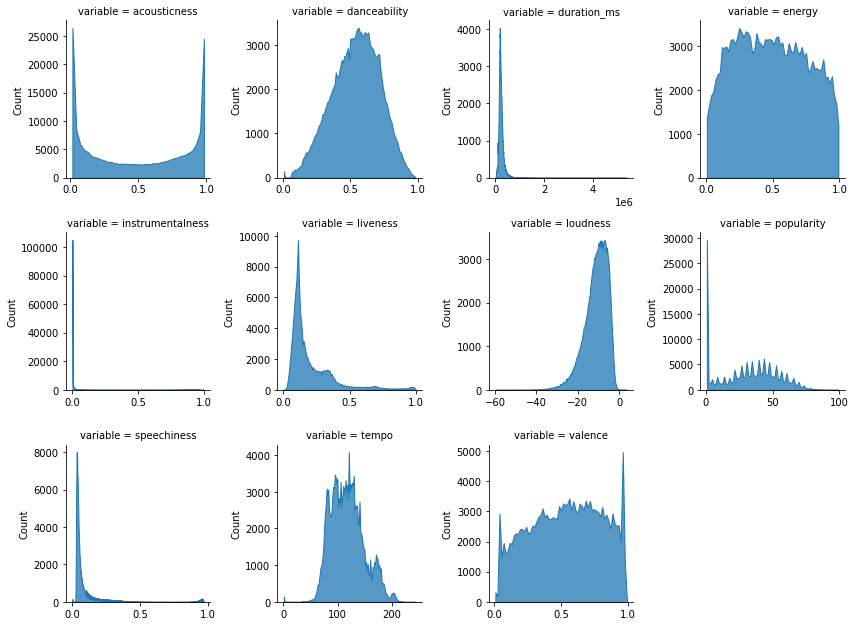

In [11]:
import seaborn as sns

# View feature distributions
long = pd.melt(df.drop(columns=['explicit', 'key', 'mode', 'year']))
g = sns.FacetGrid(long, col='variable', palette='Set1', col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', element='poly')
g.set(xlabel=None)

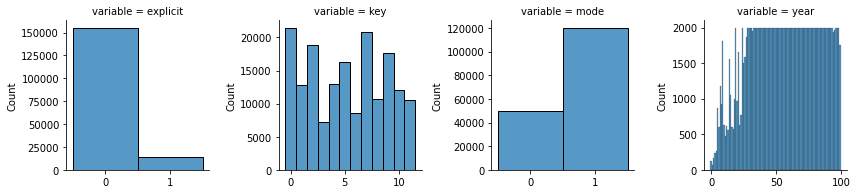

In [12]:
# Binned Data
long = pd.melt(df[['explicit', 'key', 'mode', 'year']])
g = sns.FacetGrid(long, col='variable', palette='Set1', col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', discrete=True)
g.set(xlabel=None)

<AxesSubplot:>

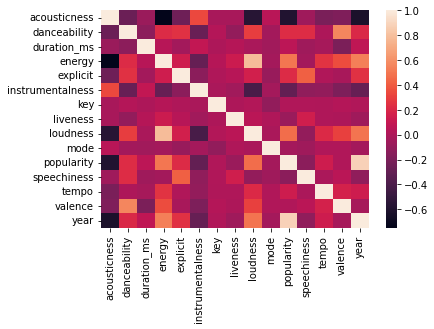

In [13]:
# Correlation chart
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

## Observations
There appears to be a correlation between popularity and year which could be explained by newer songs having a higher popularity due to the catalog being on an online platform. Spotify users likely aren't listening to songs released over 40 years ago. There is also a strong correlation between loudness and energy which is logical and were probably derived from overlapping observations. We see medium strength correlations between valence/danceability, energy/year, popularity/energy, and speechiness/explicit.